# Exploratory Data Analysis

This notebook examines the raw data extracted by tagging the training/validation demo files.

In [49]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [50]:
# load in raw csv files
dtypes = {
    'roundWinner': 'object',
    'aliveCt': np.uint8,
    'aliveT': np.uint8,
    'meanHealthCt': np.float64,
    'meanHealthT': np.float64,
    'meanValueCt': np.float64,
    'meanValueT': np.float64,
    'roundTime': np.float64,
    'bombTime': np.float64,
    'bombDefused': np.bool_
}
converters = {
    'roundWinner': lambda v: 'CT' if int(v) == 0 else 'T'
}

train_df = pd.read_csv('./train.csv', dtype=dtypes, converters=converters)
val_df = pd.read_csv('./val.csv', dtype=dtypes, converters=converters)
all_df = pd.concat([train_df, val_df])

## Raw Data Summaries

### Overall Summary

In [54]:
display(all_df.describe())

,aliveCt,aliveT,meanHealthCt,meanHealthT,meanValueCT,meanValueT,roundTime,bombTime
count,832987.000000,832987.000000,832987.000000,832987.000000,832987.000000,832987.000000,832987.000000,832987.000000
mean,3.964793,3.800416,88.820201,83.137062,4712.433075,4190.838255,47.586372,2.140075
std,1.245393,1.352724,16.503797,21.289363,1943.207313,1661.656439,31.971849,6.803815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,83.000000,75.000000,3860.000000,3730.000000,19.593750,0.000000
50%,4.000000,4.000000,95.666667,90.200000,5500.000000,4840.000000,42.765625,0.000000
75%,5.000000,5.000000,100.000000,100.000000,6150.000000,5330.000000,71.937500,0.000000
max,5.000000,5.000000,100.000000,100.000000,8250.000000,7750.000000,174.554688,41.062500


### Round Winner Distribution

Looking for bias in the target column.

In [72]:
display(pd.DataFrame(all_df['roundWinner'].value_counts()))

,roundWinner
CT,423277
T,409710


## Feature Relationships

A pairwise plot of all features against each other, showing combined trends. Individual plot points are coloured blue if they represent a CT round win, and orange for a T round win.

Plots are generated from a small sample of the overall dataset.

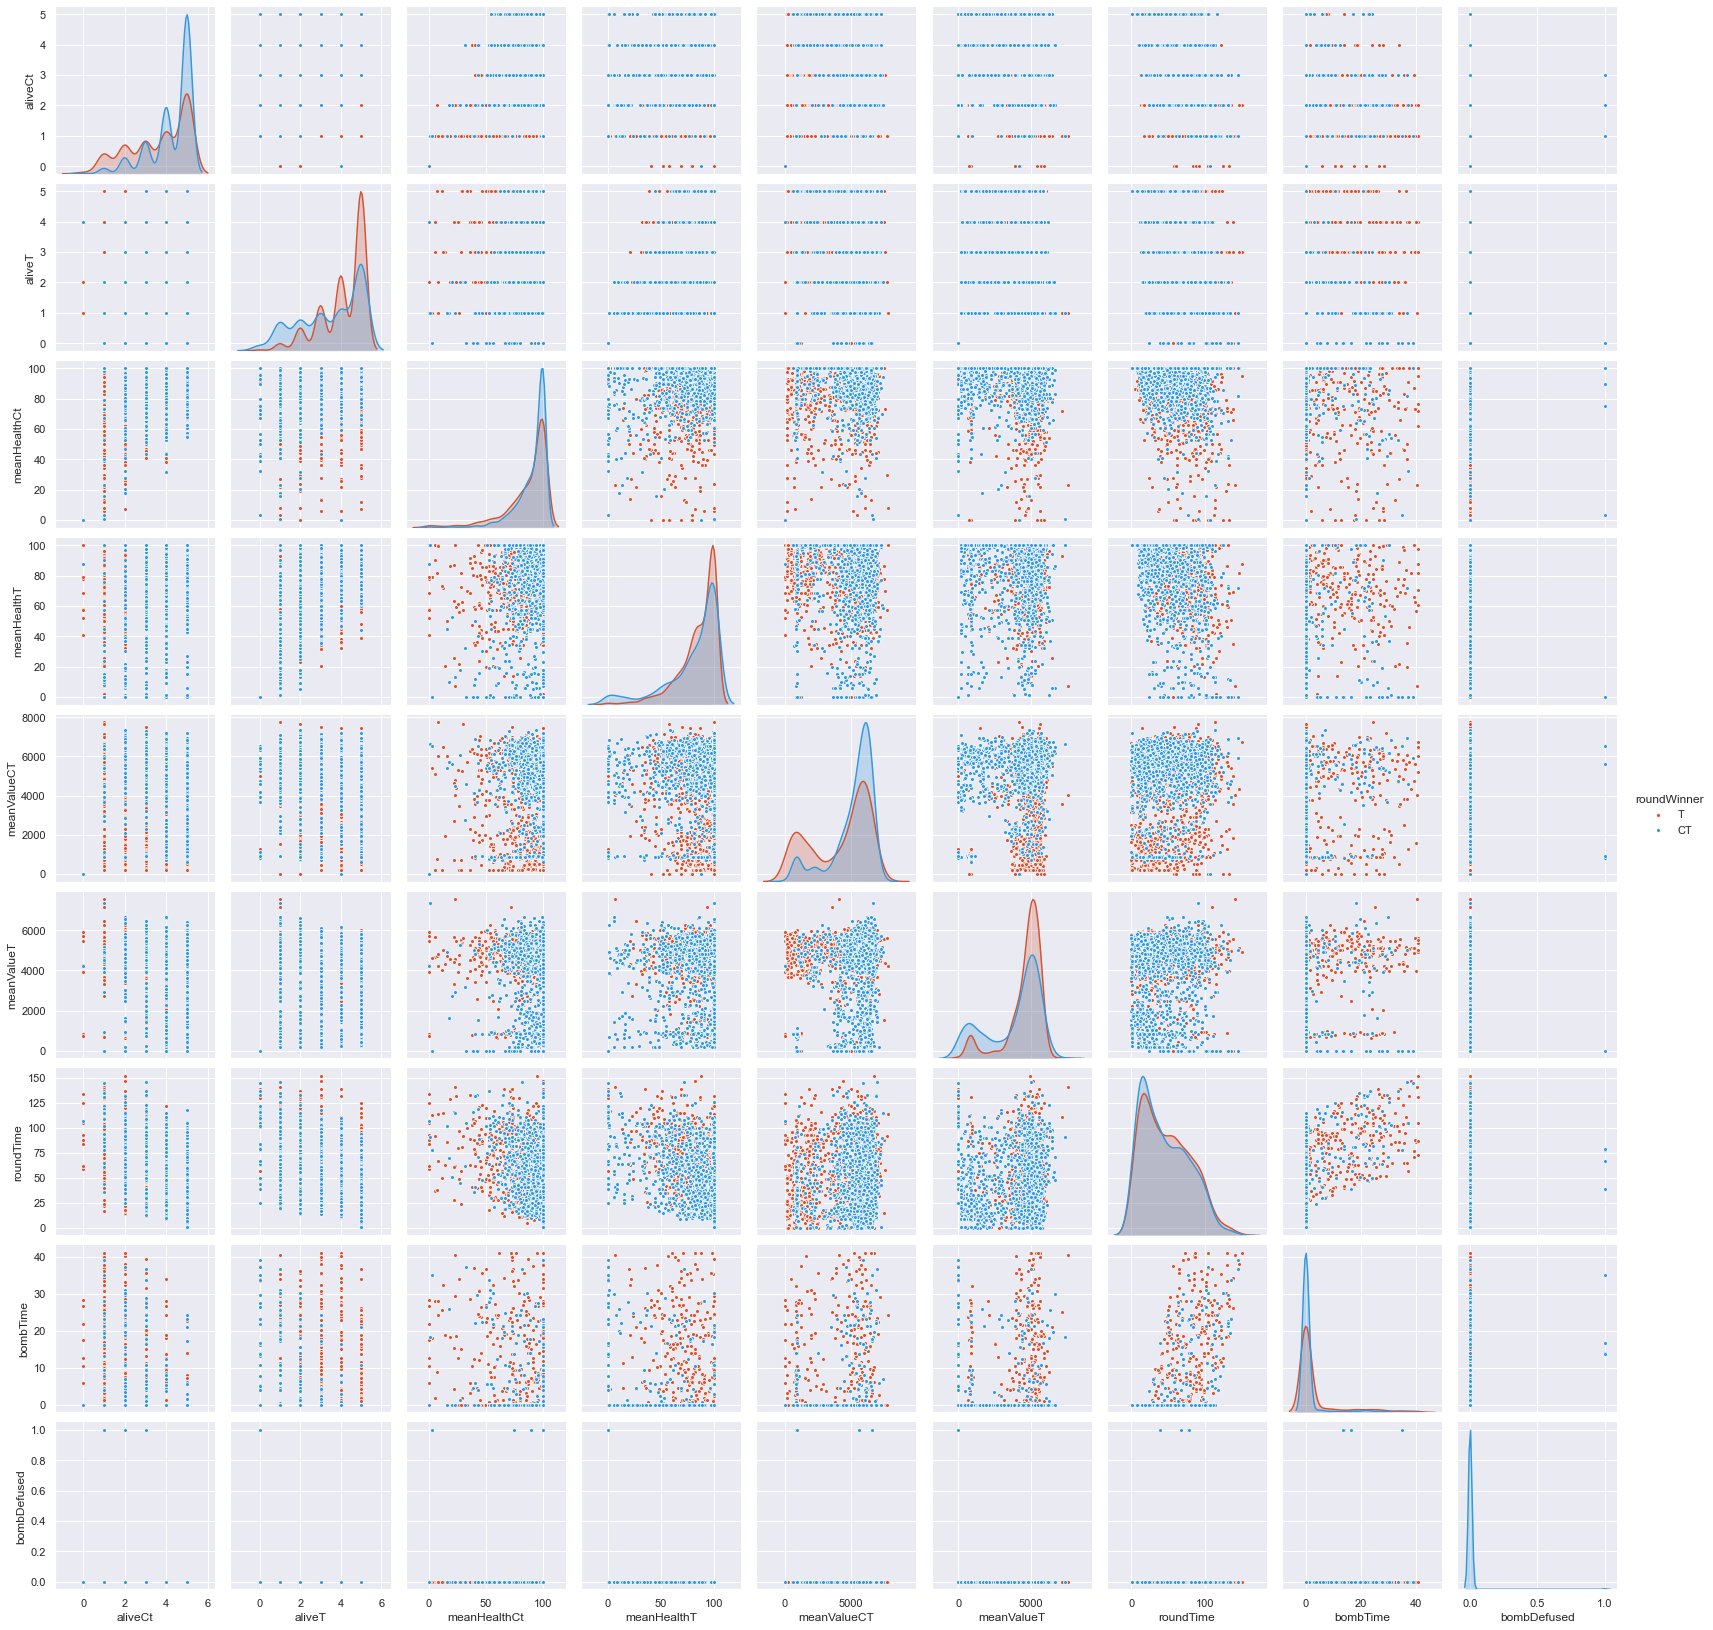

In [74]:
palette = sns.color_palette([(0xd3/0xff, 0x54/0xff, 0x34/0xff, 0.5), (0x34/0xff, 0x98/0xff, 0xdb/0xff, 0.5)])
g = sns.pairplot(all_df.sample(n=2500, random_state=1), hue='roundWinner', markers='o', palette=palette, plot_kws={'s': 15})